# 🎛️🐍 Преобразования Фурье для обработки сигналов на Python

Данный материал представляет собой незначительно сокращенный перевод статьи Кэмерона МакЛауда [Fourier Transforms With scipy.fft: Python Signal Processing](https://realpython.com/python-scipy-fft/).

---

[Преобразование Фурье](https://ru.wikipedia.org/wiki/%D0%9F%D1%80%D0%B5%D0%BE%D0%B1%D1%80%D0%B0%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%A4%D1%83%D1%80%D1%8C%D0%B5) – повсеместно используется для анализа сигналов – от обработки звука до сжатия изображений, от инженерных расчетов до Data Science. Популярная Python-библиотека SciPy предоставляет готовую реализацию преобразования Фурье в модуле `scipy.fft`.

Сам модуль поначалу выглядит устрашающе. Виной тому множество однотипно названных функций и то, что [документация](https://docs.scipy.org/doc/scipy/reference/tutorial/fft.html) оперирует технической терминологией без каких-либо пояснений. Но есть и хорошие новости: чтобы начать использовать модуль, достаточно усвоить лишь несколько основных концепций.

Не волнуйтесь, если не чувствуете себя уверенно в математических изысканиях – мы рассмотрим алгоритм на конкретном практическом примере. Чтобы представить преобразование Фурье визуально, обязательно посмотрите [ролик 3Blue1Brown](https://www.youtube.com/watch?v=spUNpyF58BY) (есть русские субтитры).

Из этого руководства вы узнаете:
- как и когда использовать преобразование Фурье;
- как для вашей задачи выбрать правильную функцию из `scipy.fft`;
- как посмотреть и изменить частотный спектр сигнала;
- примеры доступных в `scipy.fft` преобразований.

# Модуль scipy.fft

## Установка SciPy и Matplotlib

Прежде чем начать, необходимо установить SciPy, NumPy (библиотека для работы с массивами) и Matplotlib (библиотека для визуализации данных). Вы можете сделать это одним из двух способов:

1. **С помощью Anaconda**: загрузите и установите [Anaconda Individual Edition](https://www.anaconda.com/products/individual). В этот набор инструментов уже включены перечисленные библиотеки.
2. **С помощью `pip`** вы можете установить (или обновить) библиотеки посредством следующей команды:

```bash
python -m pip install -U numpy scipy matplotlib
```

Вы можете убедиться, что установка прошла успешно, запустив следующий код:

In [1]:
import numpy, scipy, matplotlib
print(numpy.__version__)
print(scipy.__version__)
print(matplotlib.__version__)

1.19.4
1.5.3
3.3.2


Этот код импортирует NumPy, SciPy, Matplotlib и выведет версии модулей, если они установлены в системе.

## Разница между `scipy.fft` и другими модулями

Очертим различия между модулем `scipy.fft` и другими модулями со схожими названиями. При просмотре документации SciPy вы обнаружите два схожих модуля:

1. `scipy.fft`
2. `scipy.fftpack`

Модуль `scipy.fft` новее и предпочтительнее, чем `scipy.fftpack`:
- `scipy.fft` имеет улучшенный интерфейс;
- `scipy.fft` позволяет использовать несколько воркеров, что в некоторых ситуациях может повысить скорость.

Реализация быстрого преобразования Фурье (англ. Fast Fourier transform,  FFT) в SciPy содержит больше функций и более вероятно будет исправлена в случае обнаружения ошибки, чем реализация NumPy (`numpy.fft`), которая поддерживает реализацию FFT лишь для обеспечения [обратной совместимости](https://www.scipy.org/scipylib/faq.html#what-is-the-difference-between-numpy-and-scipy).


# Преобразование Фурье

Анализ Фурье – область математического анализа, отвечающая на вопрос, как можно представить математическую функцию в виде комбинации простых тригонометрических функций. Преобразование Фурье – это инструмент, который позволяет в исследуемом сигнале увидеть вклад каждой из этих гармонических составляющих, которые обычно обладают различными частотами. В этом смысле говорят, что преобразование Фурье позволяет разложить функцию по частотам.

Итак, мы будем говорить о трех компонентах:
- **Сигнал** – некоторая информация, которая меняется со временем. Например, аудиосигнал, видеосигнал, изменение разности электрических потенциалов – всё это примеры сигналов.
- **Частота** (англ. frequency) – это скорость, с которой что-то повторяется. Например, часы тикают с частотой один герц (1 Гц) или, иначе говоря, совершают одно колебание в секунду.
- **Мощность** (англ. power) – в данном случае просто мощность сигнала для каждой частоты.

Следующее изображение иллюстрирует примеры гармонических сигналов различной частоты и мощности.

![](https://files.realpython.com/media/freqpower2.f3dbf5bddc29.png)

Пики высокочастотной синусоидальной волны расположены ближе друг к другу, чем пики низкочастотной. Синусоидальная волна малой мощности имеет меньшую амплитуду, чем две другие синусоидальные волны.

Представьте, что вы использовали преобразование Фурье для записи того, как кто-то играет на фортепиано аккорд из трёх нот. Результирующий частотный спектр покажет три пика – по одному для каждой ноты. Если человек играл одну ноту мягче, чем две другие, то мощность для частоты этой ноты была бы меньше, чем для двух других.

![](https://files.realpython.com/media/pianofreqblue.ff266a14503f.png)

# Зачем вам может понадобиться преобразование Фурье?

Преобразование Фурье полезно во многих приложениях. Например, Shazam и другие службы распознавания музыки используют преобразование Фурье для идентификации песен. Алгоритм сжатия [JPEG](https://ru.wikipedia.org/wiki/JPEG) представляет собой вариант преобразования Фурье, применяемый для удаления высокочастотных компонент изображений. В распознавании речи преобразование Фурье и связанные с ним преобразования служат для восстановления произнесенных слов.

Задача преобразования Фурье возникает всякий раз, когда нужно как-либо работать с сигналом, представляемым в пространстве частот. 

## Временная область против частотной области

Далее мы будем иметь дело с [временно́й](https://ru.wikipedia.org/wiki/%D0%92%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D0%B0%D1%8F_%D0%BE%D0%B1%D0%BB%D0%B0%D1%81%D1%82%D1%8C) и частотной областями] – двумя подходами к представлению сигнала: как информации, которая изменяется во времени и информации, отображенной в виде набора частот и соответствующих им амплитуд.

Ниже представлено характерное изображение аудиосигнала – классического примера сигнала во временной области. Горизонтальная ось соответствует времени, вертикальная ось – амплитуде.

![](https://files.realpython.com/media/timedomain.cc67471385a2.png)

Тот же звуковой сигнал можно представить разложенным по составляющим его частотам. Горизонтальная ось на рисунке ниже представляет частоту, вертикальная ось – мощность.

![](https://files.realpython.com/media/freqdomain.fdeba267dfda.png)

# Классификация преобразований Фурье

Преобразование Фурье подразделяют на категории по нескольким признакам. В первую очередь – по типу функций, с которыми работает преобразование: непрерывные или дискретные. В этом руководстве мы рассматриваем [дискретное преобразование Фурье](https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D1%81%D0%BA%D1%80%D0%B5%D1%82%D0%BD%D0%BE%D0%B5_%D0%BF%D1%80%D0%B5%D0%BE%D0%B1%D1%80%D0%B0%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%A4%D1%83%D1%80%D1%8C%D0%B5) (DFT).

Термины DFT и FFT нередко используются как взаимозаменяемые. Однако это не совсем одно и то же: быстрое преобразование Фурье (FFT) – лишь один из алгоритмов вычисления дискретного преобразования Фурье.

Еще одна линия раздела в терминологии, с которым вы столкнетесь при использовании `scipy.fft`,– разные типы ввода. Например, функция `fft()` принимает комплексные числа, а `rfft()` работает только с действительными числами. В дальнейшем мы обсудим это подробнее.

# Практический пример: удаление нежелательного шума из аудиофайла

Чтобы лучше понять преобразование Фурье и то, как его можно применить, решим задачу фильтрации звука. Намеренно создадим звуковой сигнал с высокочастотным шумом, а затем удалим шум с помощью преобразования Фурье.

## Создание сигнала

Одиночное гармоническое (синусоидальное) колебание представляют одну частоту и в музыкальном отношении является чистыми тоном. Воспользуемся свойством таких волн для генерации звука:

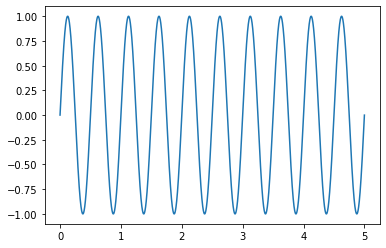

In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

SAMPLE_RATE = 44100  # Гц
DURATION = 5  # Секунды

def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate*duration, endpoint=False)
    frequencies = x * freq
    # 2pi для преобразования в радианы
    y = np.sin((2 * np.pi) * frequencies)
    return x, y

# Генерируем волну с частотой 2 Гц, которая длится 5 секунд
x, y = generate_sine_wave(2, SAMPLE_RATE, DURATION)
plt.plot(x, y)
plt.show()

После импорта NumPy и Matplotlib мы определили две константы:

1. `SAMPLE_RATE` (частота дискретизации) определяет, сколько точек используется для представления синусоидальной волны на интервале 1 с. Если бы сигнал имел частоту дискретизации 10 Гц и представлял пятисекундную синусоидальную волну, то он содержал бы 50 точек данных.
2. `DURATION` – длина сгенерированной выборки.

Затем мы определяем функцию для генерации синусоидальной волны – позже мы воспользуемся ей несколько раз. Функция принимает частоту `freq` и возвращает значения `x` и `y`, которые далее будут использоваться для построения изображения сигнала.

Координаты `x` синусоидальной волны равномерно распределены между 0 и `DURATION`. Установка `endpoint = False` в функции `np.linspace()` важна для правильной работы преобразования Фурье – предполагается, что сигнал является периодическим.

Ось `x` представляет время в секундах – обратите внимание, что синусоидальная волна действительно совершает два колебания в секунду. Эта синусоида имеет [слишком низкую частоту](https://ru.wikipedia.org/wiki/%D0%9F%D1%81%D0%B8%D1%85%D0%BE%D0%B0%D0%BA%D1%83%D1%81%D1%82%D0%B8%D0%BA%D0%B0#%D0%9F%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D1%8B_%D0%B2%D0%BE%D1%81%D0%BF%D1%80%D0%B8%D1%8F%D1%82%D0%B8%D1%8F_%D0%B7%D0%B2%D1%83%D0%BA%D0%B0), чтобы ее можно было слышать, поэтому в следующем разделе мы сгенерируем несколько высокочастотных синусоид и рассмотрим, как их можно смешивать.

## Смешивание аудиосигналов
Микширование аудиосигналов состоит всего из двух этапов:
- cложение сигналов;
- нормализация результата.

In [3]:
_, nice_tone = generate_sine_wave(400, SAMPLE_RATE, DURATION)
_, noise_tone = generate_sine_wave(4000, SAMPLE_RATE, DURATION)

noise_tone = noise_tone * 0.3
mixed_tone = nice_tone + noise_tone

Здесь мы генерируем тон частоты 400 Гц (`nice_tone`) и «шум» (`noise_tone`) – тон высокой частоты 4000 Гц, амплитуду которого мы уменьшаем с помощью коэффициента `0.3`. 

Символ подчеркивания (`_`) мы используем, чтобы отбросить значения `x`, возвращаемые функцией `generate_sine_wave()` – нам не нужно складывать значения времени.

Следующий шаг – нормализация, масштабирование сигнала под целевой формат. В нашем случае это 16-битное целое число в диапазоне от `-32768` до `32767`:

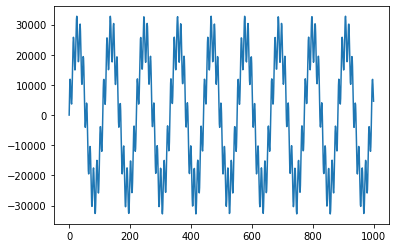

In [4]:
normalized_tone = np.int16((mixed_tone / mixed_tone.max()) * 32767)

plt.plot(normalized_tone[:1000])
plt.show()

Деление `mixed_tone` на максимальное значение масштабирует его в интервале от `-1` до `1`. Умножение на `32767` масштабирует сигнал между `-32767` и `32767`, что примерно соответствует диапазону `np.int16`. Код отображает только первые `1000` точек, чтобы мы могли четче проследить структуру сигнала. Синусоидальная волна, которую мы видим, – это сгенерированный нами тон 400 Гц, искаженный тоном 4000 Гц.

Чтобы прослушать звук, необходимо сохранить его в формате, который может прочитать аудиоплеер. Воспользуемся методом SciPy `wavfile.write` и сохраним результат в файле формата [WAV](https://ru.wikipedia.org/wiki/WAV). Выбранное нами 16-битное целочисленное представление является стандартным типом данных для wav-файлов.

In [5]:
from scipy.io.wavfile import write

write("mysinewave.wav", SAMPLE_RATE, normalized_tone)

Этот код запишет данные в файл `mysinewave.wav` в директории, где мы запускаем этот скрипт Python. Файл можно прослушать с помощью любого медиаплеера. 

# Используем быстрое преобразование Фурье для удаления шума
Быстрое преобразование Фурье (FFT) – алгоритм, который позволяет вычислить частотный спектр сигнала:

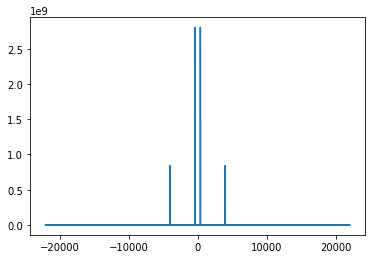

In [6]:
from scipy.fft import fft, fftfreq

# число точек в normalized_tone
N = SAMPLE_RATE * DURATION

yf = fft(normalized_tone)
xf = fftfreq(N, 1 / SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()

На построенном спектре видны два пика на положительных частотах и два их зеркальных отражения в отрицательной области. Пики положительных частот находятся на позициях 400 и 4000 Гц.

Преобразование Фурье взяло колеблющийся сигнал и разложило его по содержащимся в нем частотам. Поскольку мы сами внесли только две частоты, на выходе преобразования мы видим только их. Симметричное представление в положительной и отрицательной областях – побочный эффект ввода действительных значений в преобразование Фурье, о чём мы поговорим подробнее в дальнейшем.

Самый важный раздел в этом небольшом скрипте – вычисление преобразования Фурье:

In [7]:
yf = fft(normalized_tone)
xf = fftfreq(N, 1/SAMPLE_RATE)

Код вызывает две функции:
1. `fft()` вычисляет само преобразование.
2. `fftfreq()` находит частоты в центре каждого «бина» на выходе `fft()`. Без этого не было бы возможности построить ось `x` нашего спектра.

Под бином здесь понимается интервал значений, сгруппированных аналогично гистограмме. В рамках этого руководства достаточно рассматривать их как отдельные значения.

Интересной частью кода является обработка, выполняемая с `yf` перед построением – вызов `np.abs()` для yf вызван лишь тем, что значения `yf` – комплексные числа.

[Комплексное число](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D0%BC%D0%BF%D0%BB%D0%B5%D0%BA%D1%81%D0%BD%D0%BE%D0%B5_%D1%87%D0%B8%D1%81%D0%BB%D0%BE) – это число, состоящее из двух частей: действительной и мнимой. Такие необычные числа полезны во многих приложениях, но если вы столкнулись с ними впервые, то сейчас достаточно знать лишь то, что они существуют.

Математики обычно записывают комплексные числа в форме `a + bi`, где `a` – действительная часть, `b` – мнимая часть, `i` – [мнимая единица](https://ru.wikipedia.org/wiki/%D0%9C%D0%BD%D0%B8%D0%BC%D0%B0%D1%8F_%D0%B5%D0%B4%D0%B8%D0%BD%D0%B8%D1%86%D0%B0).

Поскольку комплексные числа состоят из двух компонент, построение графика их зависимости от частоты на двумерной оси требует, преобразовать два значения в одно. На помощь приходит `np.abs()`. Эта функция вычисляет √(a²+b²).

---
**Примечание**. Кстати, по графику можно заметить, что `fft()` возвращает в качестве максимальной частоты чуть более 20 тысяч герц, а именно: 22050 Гц. Это значение составляет ровно половину частоты дискретизации и называется [частотой Найквиста](https://ru.wikipedia.org/wiki/%D0%A7%D0%B0%D1%81%D1%82%D0%BE%D1%82%D0%B0_%D0%9D%D0%B0%D0%B9%D0%BA%D0%B2%D0%B8%D1%81%D1%82%D0%B0). Действительно, из фундаментальной теоремы обработки сигналов ([теорема Котельникова](https://ru.wikipedia.org/wiki/%D0%A2%D0%B5%D0%BE%D1%80%D0%B5%D0%BC%D0%B0_%D0%9A%D0%BE%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2%D0%B0)), следует, что частота дискретизации должна как минимум вдвое превышать максимальную частоту сигнала.

---

# Обрабатываем сигнал еще быстрее с помощью `rfft()`

Частотный спектр, выдаваемый `fft()`, зеркально отражался относительно оси y. Эта симметрия вызвана вводом в преобразование действительных чисел. Эту симметрию можно использовать, чтобы ускорить преобразование Фурье, вычислив лишь половину с помощью функции `rfft()`.

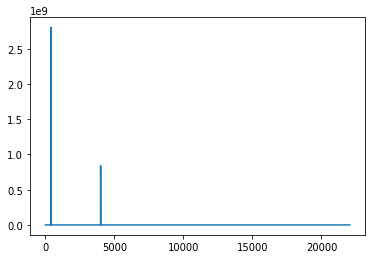

In [8]:
from scipy.fft import rfft, rfftfreq

# обратите внимание на r в начале имён функций
yf = rfft(normalized_tone)
xf = rfftfreq(N, 1/SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()

# Фильтрация сигнала

Самая замечательная вещь в преобразовании Фурье заключается в том, что оно обратимо. Любой сигнал, измененный в частотной области, можно преобразовать обратно во временную область. Воспользуемся этим, чтобы отфильтровать высокочастотный шум.

Возвращаемые `rfft()` значения  соответствуют мощности каждого частотного бина. Если мы установим мощность бина равной нулю, соответствующая частота перестанет присутствовать в результирующем сигнале во временной области:

In [9]:
# Максимальная частота составляет половину частоты дискретизации
points_per_freq = len(xf) / (SAMPLE_RATE / 2)

# Наша целевая частота - 4000 Гц
target_idx = int(points_per_freq * 4000)

Обнулим `yf` для индексов около целевой частоты:

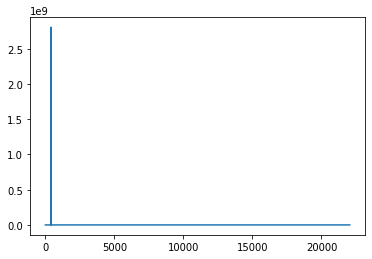

In [10]:
yf[target_idx-2:target_idx+2] = 0

plt.plot(xf, np.abs(yf))
plt.show()

Остался только один пик. Применим обратное преобразование Фурье, чтобы вернуться во временную область.

# Применение обратного преобразования Фурье

Применение обратного FFT аналогично применению FFT:

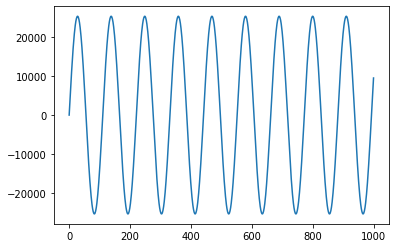

In [11]:
from scipy.fft import irfft

new_sig = irfft(yf)

plt.plot(new_sig[:1000])
plt.show()

Поскольку мы использовали `rfft()`, для обратного преобразования нужно использовать `irfft()`. Однако, если бы мы использовали `fft()`, обратной функцией была бы `ifft()`.

Как видите, теперь есть одна синусоида, колеблющаяся с частотой 400 Гц – мы успешно удалили шум на 4000 Гц.

Нормализуем сигнал и запишем результат в файл. Сделать это можно так же, как в прошлый раз:

In [12]:
norm_new_sig = np.int16(new_sig * (32767 / new_sig.max()))
write("clean.wav", SAMPLE_RATE, norm_new_sig)

Проиграв файл, вы услышите, что раздражающий писк исчез.

**Будьте осторожны с фильтрацией**. Приведенный пример в большей мере  предназначен для образовательных целей, чем для реального использования. Воспроизведение процесса для таких сигналов, как музыкальные произведения, может даже создать больше шума, чем устранить.

Для фильтрации сигналов обычно используются специальные функции проектирования фильтров пакета `scipy.signal`. Фильтрация – сложная тема, требующая математической подготовки. Хорошее введение в фильтрацию сигналов дает книга Стивена Смита [The Scientist and Engineer's Guide to
Digital Signal Processing](https://www.dspguide.com/ch14.htm).

# Дискретные косинусные и синусоидальные преобразования
Туториал по модулю `scipy.fft` был бы неполным без рассмотрения дискретного [косинусного](https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D1%81%D0%BA%D1%80%D0%B5%D1%82%D0%BD%D0%BE%D0%B5_%D0%BA%D0%BE%D1%81%D0%B8%D0%BD%D1%83%D1%81%D0%BD%D0%BE%D0%B5_%D0%BF%D1%80%D0%B5%D0%BE%D0%B1%D1%80%D0%B0%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5) (DCT) и синусоидального (DST) преобразований. Эти два преобразования тесно связаны с преобразованием Фурье, но работают только с действительными числами. В библиотеке SciPy соответствующие преобразования реализованы в виде функций `dct()` и `dst()`. Варианты этих функций с названиями, начинающимися с  `i` и `n`, представляют соответственно обратные и n-мерные версии функций.

Упрощенно говоря, DCT и DST – как бы две половины преобразования Фурье, которые по отдельности вычисляются быстрее, чем полное преобразование Фурье. Прежде чем вы научитесь выбирать между ними, нужно освежить в памяти понятие **четных** и **нечетных** функций. Четные функции симметричны относительно оси `y`, а нечетные функции симметричны относительно начала координат. Чтобы представить это наглядно, взгляните на следующие примеры.

![](https://files.realpython.com/media/evenandodd.8410a9717f96.png)

При расчете полного преобразования Фурье (DFT) предполагается, что функция, по которой происходит вычисление, повторяется бесконечно. Однако преобразования DCT и DST позволяют учесть симметрию сигнала. Косинусное преобразование (DCT) предполагает, что функция продлевается за счет четной симметрии, а для DST – за счет нечетной симметрии.

На следующем изображении показано, как каждое преобразование представляет, как функция будет продолжаться в бесконечности.

![](https://files.realpython.com/media/funcextension.8794e9dc3154.png)

На изображении выше полное преобразование повторяет функцию как есть. DCT отражает функцию по вертикали, а DST – по горизонтали. Обратите внимание, что симметрия DST приводит к существенным разрывам функции. Это вносит высокочастотные составляющие в результирующем частотном спектре. Если нет сведений о симметрии сигнала, лучше использовать DCT.

Есть [множество примеров](https://en.wikipedia.org/wiki/Discrete_cosine_transform) использования DCT в различных задачах, требующих высокой скорости преобразования Фурье, в том числе в алгоритмах JPEG, MP3 и WebM.

# Заключение

Преобразование Фурье – это мощная концепция, применяемая в самых разных областях – от чистой математики до аудиотехники и даже финансов. В этом уроке мы рассмотрели:
- как и когда используется преобразование Фурье
- как выбрать нужную функцию из `scipy.fft`
- в чем разница между временной и частотной областями
- как посмотреть и изменить частотный спектр сигнала
- как использовать `rfft()`, чтобы преобразование выполнялось еще быстрее

Мы рассмотрели только базовую идею, но ее понимание поможет разобраться в других вопросах, связанных с преобразованием Фурье и представлением функций в виде частотных спектров.

---

Если вам понравился стиль изложения, другие подобные материалы в виде блокнотов Jupyter, вы найдете на главной странице репозитория [matyshkin/lessons](https://github.com/matyushkin/lessons).